# By:Priyanshi Garg

## THE SPARKS FOUNDATION

## DATA SCIENCE AND BUSINESS ANALYTICS INTERN (#GRIPJan21)

### Task2 :  Prediction using Unsupervied Machine Learning

#### From the given dataset, predict the optimum number of clusters and represent it visually.(we will use the K-means algorithm in order to carry-out the task).

#### Dataset: https://bit.ly/3kXTdox



##### Importing the Libraries & Packages

In [66]:
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

##### Loading the dataset

In [67]:
IrisDataset = datasets.load_iris()
iris= pd.DataFrame(IrisDataset.data, columns = IrisDataset.feature_names)
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [68]:
iris.shape

(150, 4)

In [69]:
iris.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

###### Finding the optimum number of clusters for k-means classification

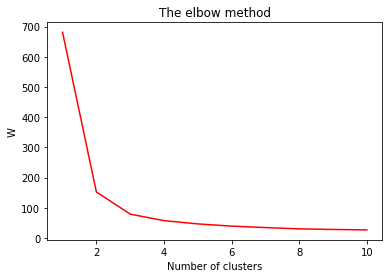

In [70]:
x = IrisDataset.data
y=IrisDataset.target
w = []
for i in range(1, 11):
    k = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    k.fit(x)
    w.append(k.inertia_)

plt.plot(range(1, 11), w,c='red')
plt.ylabel('W') 
plt.xlabel('Number of clusters')
plt.title('The elbow method')
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

#### From this we choose the number of clusters as 3.

##### Applying kmeans to the dataset / Creating the kmeans classifier

In [77]:
kx = KMeans(n_clusters = 3)
ky = kx.fit_predict(x)
print(IrisDataset.target)
ky

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

###### Comparing Actual vs Predicted Clusters

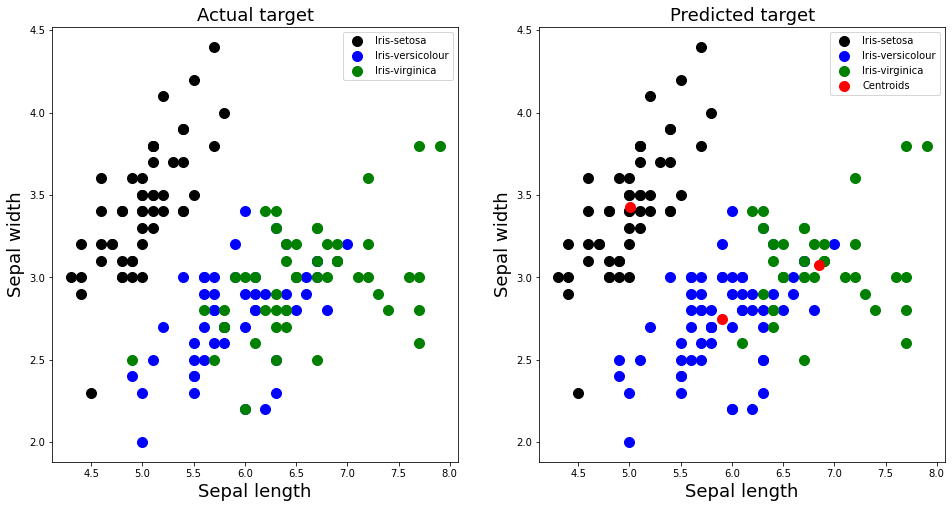

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].set_title('Actual target', fontsize=18)
axes[0].scatter(x[y == 0, 0], x[y == 0, 1],s = 100, c = 'black', label = 'Iris-setosa')
axes[0].scatter(x[y == 1, 0], x[y == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
axes[0].scatter(x[y == 2, 0], x[y == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[0].legend()

axes[1].set_title('Predicted target', fontsize=18)
axes[1].scatter(x[ky == 0, 0], x[ky == 0, 1],s = 100, c = 'black', label = 'Iris-setosa')
axes[1].scatter(x[ky == 1, 0], x[ky == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
axes[1].scatter(x[ky == 2, 0], x[ky == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
axes[1].scatter(kx.cluster_centers_[:, 0], kx.cluster_centers_[:,1],s = 100, c = 'red', label = 'Centroids')
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[1].legend()
plt.show()

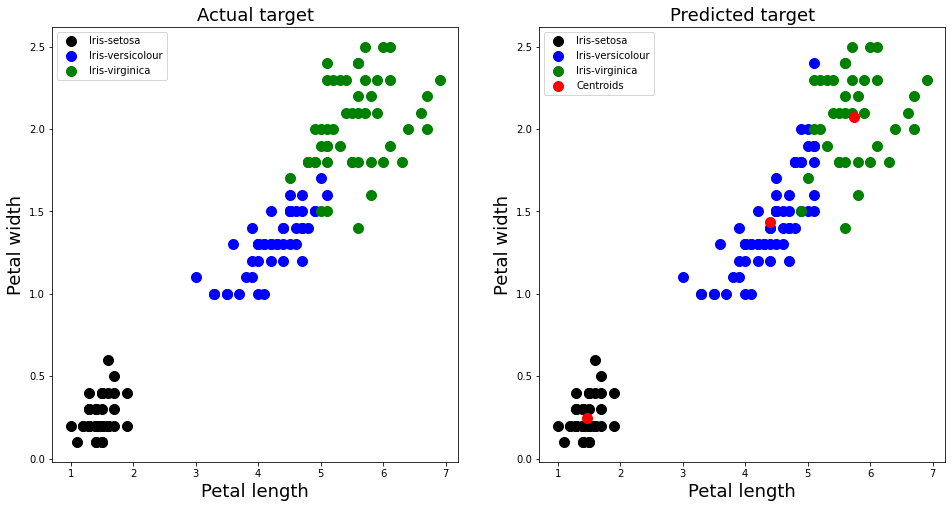

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].set_title('Actual target', fontsize=18)
axes[0].scatter(x[y == 0, 2], x[y == 0, 3],s = 100, c = 'black', label = 'Iris-setosa')
axes[0].scatter(x[y == 1, 2], x[y == 1, 3],s = 100, c = 'blue', label = 'Iris-versicolour')
axes[0].scatter(x[y == 2, 2], x[y == 2, 3],s = 100, c = 'green', label = 'Iris-virginica')
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[0].legend()

axes[1].set_title('Predicted target', fontsize=18)
axes[1].scatter(x[ky == 0, 2], x[ky == 0, 3],s = 100, c = 'black', label = 'Iris-setosa')
axes[1].scatter(x[ky == 1, 2], x[ky == 1, 3],s = 100, c = 'blue', label = 'Iris-versicolour')
axes[1].scatter(x[ky == 2, 2], x[ky == 2, 3],s = 100, c = 'green', label = 'Iris-virginica')
axes[1].scatter(kx.cluster_centers_[:, 2], kx.cluster_centers_[:,3],s = 100, c = 'red', label = 'Centroids')
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[1].legend()
plt.show()

### Conclusion
#### I was able to carry-out Prediction using Unsupervised ML successfully and classify the data into optimum number of Clusters.
### Thankyou